<a href="https://colab.research.google.com/github/aemiralfath/BPML-Dicoding/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir /root/.kaggle/
! cp "/content/drive/My Drive/Machine Learning/kaggle.json" /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=2cecdfe412c3a49d1d8f0714564352b8e1a059f40a38591c4cb038e7c051b1af
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 3.20MB/s]


In [ ]:
import zipfile

zipref = zipfile.ZipFile('iris.zip', 'r')
zipref.extractall()
zipref.close()

In [ ]:
df = pandas.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns='Id')

In [ ]:
category = pandas.get_dummies(df['Species'])
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
new_df = pandas.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [ ]:
x = dataset[:, 0:4]
y = dataset[:, 4:7]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

In [ ]:
import tensorflow as tf

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.9:
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax')

])

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    x_train,
    y_train,
    epochs=100,
    steps_per_epoch=int(len(x_train)/10),
    validation_data=(x_val, y_val),
    validation_steps=int(len(x_val)/10),
    callbacks=[callbacks]
)

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 1.0676 - accuracy: 0.3889 - val_loss: 1.0172 - val_accuracy: 0.5333
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.9874 - accuracy: 0.6556 - val_loss: 0.9498 - val_accuracy: 0.6000
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.9092 - accuracy: 0.6889 - val_loss: 0.8868 - val_accuracy: 0.6000
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.8305 - accuracy: 0.6889 - val_loss: 0.8206 - val_accuracy: 0.6000
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.7476 - accuracy: 0.6889 - val_loss: 0.7542 - val_accuracy: 0.6000
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6705 - accuracy: 0.6889 - val_loss: 0.6950 - val_accuracy: 0.6000
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6889 - val_loss: 0.6480 - val_accuracy: 0.6000
Epoch 8/100
9/9 [=========

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.9333


[0.34037309885025024, 0.9333333373069763]

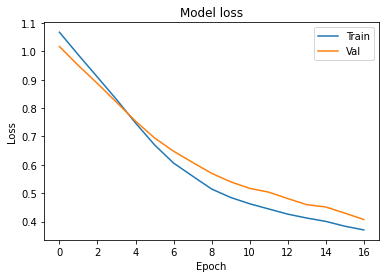

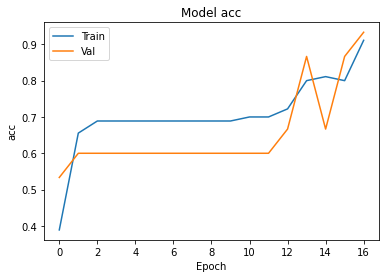

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.figure()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()